In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.run_functions_eagerly(True)

In [4]:
img_dir = r'C:\Users\Kartik\Desktop\braincancer\photoofcancer\brain_tumor_dataset'


In [5]:
BATCH_SIZE=64
IMAGE_SIZE=150
input_shape = (150,150,1)

In [6]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [7]:
train_gen = data_gen.flow_from_directory(img_dir,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode="grayscale",
                                        shuffle=True,
                                        class_mode ="categorical",
                                        subset ="training")

Found 203 images belonging to 2 classes.


In [8]:
val_gen = data_gen.flow_from_directory(
    img_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    subset="validation"
)

Found 50 images belonging to 2 classes.


In [9]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['no', 'yes']


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(150, 150, 1)), 
    Conv2D(16, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(2, activation="softmax")
])


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,240,002 (81.02 MB)

 Trainable params: 21,240,002 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
steps_per_epoch = len(train_gen)  # Instead of manually dividing total_samples/batch_size
validation_steps = len(val_gen)


In [22]:
history = model.fit(train_gen, 
                    epochs=5, 
                    validation_data=val_gen, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_steps=validation_steps)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 803ms/step - accuracy: 0.7724 - loss: 0.4503 - val_accuracy: 0.7400 - val_loss: 0.4996
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 719ms/step - accuracy: 0.8318 - loss: 0.4215 - val_accuracy: 0.7800 - val_loss: 0.5544
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 793ms/step - accuracy: 0.8840 - loss: 0.3667 - val_accuracy: 0.7400 - val_loss: 0.5121
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 765ms/step - accuracy: 0.8793 - loss: 0.3284 - val_accuracy: 0.7800 - val_loss: 0.5006
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 788ms/step - accuracy: 0.8765 - loss: 0.2946 - val_accuracy: 0.7600 - val_loss: 0.5130


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.7600 - loss: 0.5130


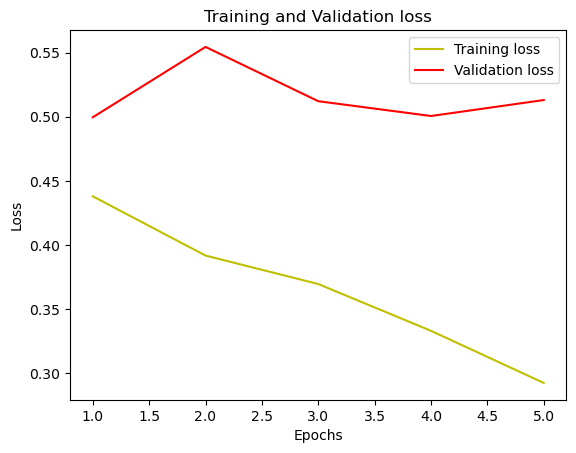

In [23]:
test_loss, test_acc = model.evaluate(val_gen)

loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

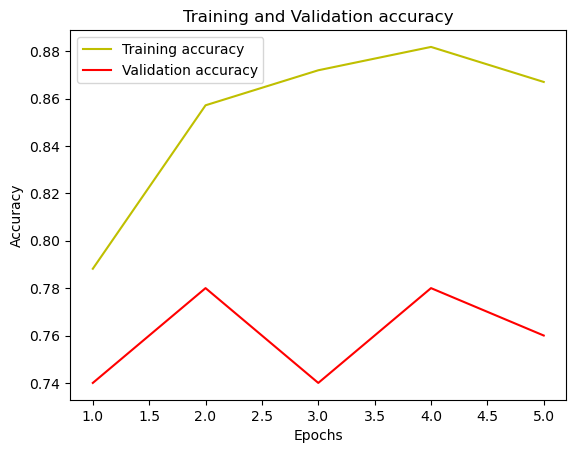

In [24]:
plt.plot(epochs, history.history['accuracy'], 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
keras.saving.save_model(model, "my_model.keras")


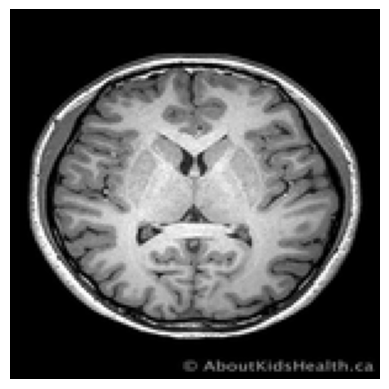

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted class: 0


In [38]:
#from matplotlib.pyplot import imshow
#from PIL import Image,ImageOps

#image_path = r'C:\Users\Kartik\Desktop\braincancer\photoofcancer\no\20 no.jpg'
#image = Image.open(image_path)
#size = (150,150)
#image = ImageOps.grayscale(image)
#image = image.resize(size, resample=Image.LANCZOS)
#image_array=np.asarray(image)
#plt.imshow(image_array, cmap='gray')
#plt.show()

#prediction = model.predict(data)
#print(prediction[0][0])




import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import tensorflow as tf

# Load and preprocess the image
image_path = r'C:\Users\Kartik\Desktop\braincancer\photoofcancer\no\45 no.jpg'
image = Image.open(image_path)

# Convert image to grayscale and resize
image = ImageOps.grayscale(image)
image = image.resize((150, 150), resample=Image.LANCZOS)

# Convert to NumPy array and normalize
image_array = np.asarray(image, dtype=np.float32) / 255.0  # Normalize to [0,1]
image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
image_array = np.expand_dims(image_array, axis=0)   # Add batch dimension

# Display the image
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# Make prediction
prediction = model.predict(image_array)

# Interpret the output based on activation function
if model.output_shape[-1] == 1:  # Sigmoid activation (binary classification)
    predicted_class = (prediction > 0.5).astype("int32")
else:  # Softmax activation (multi-class classification)
    predicted_class = np.argmax(prediction, axis=1)

print(f"Predicted class: {predicted_class[0]}")
